## **Predicting Plant Health Using Machine Learning Models**


- In this notebook, I aim to develop a predictive model to monitor and analyze plant health based on various environmental parameters. This initiative is a part of the smart planter project which is designed to assist both home gardeners and farmers in optimizing their yield and minimizing waste. The predictive model will utilize machine learning algorithms to analyze data from various sensors and predict the health of the plant.

### **Dataset Description**

- The dataset contains the following attributes:

   - **Humidity (%):** The percentage of water vapor present in the air surrounding the plants.
   - **Nitrogen Levels (mg/kg):** The concentration of nitrogen in the soil, measured in milligrams per kilogram.
   - **Ambient Temperature (°C):** The surrounding temperature measured in degrees Celsius.
   - **Presence of Sunlight:** A binary attribute indicating whether the plant is exposed to sunlight.
   - **Plant Health:** The target variable indicating the health status of the plant.

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score,classification_report, roc_auc_score,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

### **Data Simulation Function: generate_data**

- This function simulates the generation of a dataset with 10000 data points, which are equally distributed across three categories: 'Healthy', 'Moderate', and 'Unhealthy'. These categories represent different states of plant health. The attributes for each data point include 'Humidity (%)', 'Nitrogen Levels (mg/kg)', 'Ambient Temperature (°C)', 'Presence of Sunlight', and 'Plant Health'. The values of these attributes are generated based on certain conditions defined for each category to simulate real-world scenarios.

- **Parameters**
   - n: The total number of data points to be generated. It is set to 10000 by default.
- **Returns**
   - df: A shuffled pandas DataFrame containing the generated data points with their respective attributes.

In [2]:
# Number of data points
n = 10000

# Simulate data collection
def generate_data(n):
    data = {
        'Humidity (%)': [],
        'Nitrogen Levels (mg/kg)': [],
        'Ambient Temperature (°C)': [],
        'Presence of Sunlight': [],
        'Plant Health': []
    }
    
    # Generate a third of the data for each category
    for category in ['Healthy', 'Moderate', 'Unhealthy']:
        for _ in range(n // 3):
            if category == 'Healthy':
                data['Humidity (%)'].append(random.uniform(50, 70))
                data['Nitrogen Levels (mg/kg)'].append(random.uniform(100, 150))
                data['Ambient Temperature (°C)'].append(random.uniform(15, 25))
                data['Presence of Sunlight'].append(1)
                data['Plant Health'].append('Healthy')
            elif category == 'Moderate':
                data['Humidity (%)'].append(random.uniform(40, 80))
                data['Nitrogen Levels (mg/kg)'].append(random.uniform(80, 170))
                data['Ambient Temperature (°C)'].append(random.uniform(10, 30))
                data['Presence of Sunlight'].append(random.choice([0, 1]))
                data['Plant Health'].append('Moderate')
            else:
                data['Humidity (%)'].append(random.uniform(0, 100))
                data['Nitrogen Levels (mg/kg)'].append(random.uniform(0, 200))
                data['Ambient Temperature (°C)'].append(random.uniform(-10, 40))
                data['Presence of Sunlight'].append(random.choice([0, 1]))
                data['Plant Health'].append('Unhealthy')
    
    # Create a DataFrame and shuffle it
    df = pd.DataFrame(data)
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df

df = generate_data(n)

In [3]:
df.head(10)

,Humidity (%),Nitrogen Levels (mg/kg),Ambient Temperature (°C),Presence of Sunlight,Plant Health
0,30.106282,155.898765,31.072510,1,Unhealthy
1,50.553760,167.773776,19.728064,0,Unhealthy
2,88.266709,170.010138,0.148891,1,Unhealthy
3,57.463005,107.981662,19.433536,1,Healthy
4,56.469256,169.818744,25.361687,1,Moderate
5,58.999164,106.740579,21.320496,1,Healthy
6,17.101490,157.255390,21.392791,0,Unhealthy
7,55.536050,9.875471,36.518416,0,Unhealthy
8,41.025321,147.207273,26.866109,0,Moderate
9,36.720337,66.655274,34.696145,0,Unhealthy


In [4]:
# Save to CSV
#df.to_csv('plant_health_dataset.csv', index=False)

### **Loading the Dataset**

In [5]:
# Read CSV
df = pd.read_csv('plant_health_dataset.csv')

### **Data Preprocessing**
- Perform necessary data preprocessing steps here
- For instance, handling missing values, encoding categorical variables, etc.

In [6]:
# Handle the missing data if exists
df = df.dropna()

In [7]:
# Encode the categorical data
le = LabelEncoder()
df['Plant Health'] = le.fit_transform(df['Plant Health'])

### **Exploratory Data Analysis**
- Perform exploratory data analysis here
- For instance, using seaborn or matplotlib to visualize the data

<Axes: >

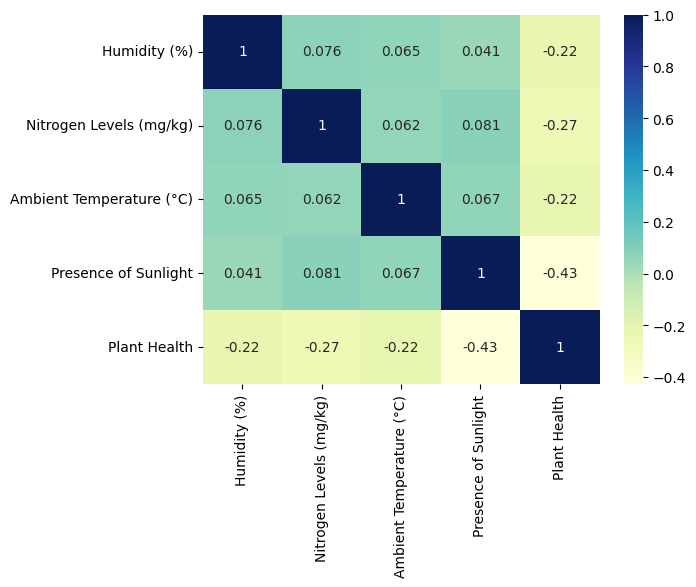

In [8]:
# Visualize the correlation
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

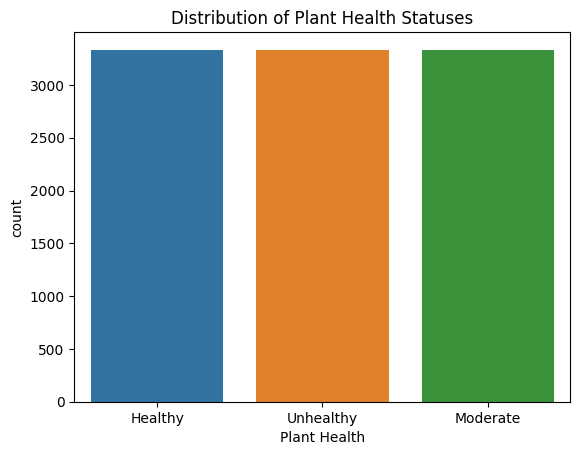

In [9]:
# Create a temporary series with replaced values
temp_series = df['Plant Health'].replace({0: 'Healthy', 1: 'Moderate', 2: 'Unhealthy'})

# Plot the distribution of plant health statuses
sns.countplot(x=temp_series)
plt.title('Distribution of Plant Health Statuses')
plt.show()

### **Model Development**
- In this section, I will develop multiple machine learning models and will compare the results of predict plant health based on the features provided.

#### **Splitting & Scaling the Data**
- Split the dataset into the 80 percent training and 20 percent testing

In [10]:
# Split the data into training and testing sets
X = df.drop('Plant Health', axis=1)
y = df['Plant Health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Feature Scaling


In [11]:
# Normalize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Model 1: Building Neural Networks**

- In this section, I will be developing a Neural Network model to predict plant health based on various environmental factors. Neural Networks are a category of algorithms modeled loosely after the human brain. They are designed to recognize patterns in complex data, and with multiple layers, they can capture intricate relationships in the dataset.

- I will start by setting up a neural network structure with several layers, including input layers, hidden layers, and an output layer. The activation functions, dropout rates, and other parameters will be fine-tuned to optimize the model's performance. I will also be implementing techniques such as batch normalization to stabilize and possibly accelerate the learning process.

- After building the model, I will compile it using an appropriate optimizer and loss function, followed by training the model with our training dataset. I will also validate the model using a separate validation dataset to avoid overfitting and to ensure that our model generalizes well to new, unseen data.

- Finally, I will evaluate the model's performance using various metrics such as accuracy and loss over the epochs, and visualize these metrics to analyze the model's learning curve and to make necessary adjustments for improvement.

In [12]:
# Import required libraries for neural networks
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.optimizers import Nadam

In [13]:
# Build a more powerful neural network using a library like TensorFlow
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer='l2'),
    Dropout(0.3),
    BatchNormalization(),
    
    Dense(128, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    BatchNormalization(),
    
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    BatchNormalization(),
    
    Dense(3, activation='softmax')
])

# Compile the model with an advanced optimizer
optimizer = Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/300
100/100 [==============================] - 7s 10ms/step - loss: 2.9538 - accuracy: 0.7153 - val_loss: 2.6747 - val_accuracy: 0.4656 - lr: 0.0010
Epoch 2/300
100/100 [==============================] - 1s 8ms/step - loss: 1.8994 - accuracy: 0.8278 - val_loss: 1.9760 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 3/300
100/100 [==============================] - 1s 9ms/step - loss: 1.2925 - accuracy: 0.8494 - val_loss: 1.3462 - val_accuracy: 0.6513 - lr: 0.0010
Epoch 4/300
100/100 [==============================] - 1s 10ms/step - loss: 0.9210 - accuracy: 0.8545 - val_loss: 0.9669 - val_accuracy: 0.7625 - lr: 0.0010
Epoch 5/300
100/100 [==============================] - 1s 8ms/step - loss: 0.7062 - accuracy: 0.8675 - val_loss: 0.7353 - val_accuracy: 0.8106 - lr: 0.0010
Epoch 6/300
100/100 [==============================] - 1s 9ms/step - loss: 0.5879 - accuracy: 0.8704 - val_loss: 0.5527 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 7/300
100/100 [==============================] - 1s 7ms/

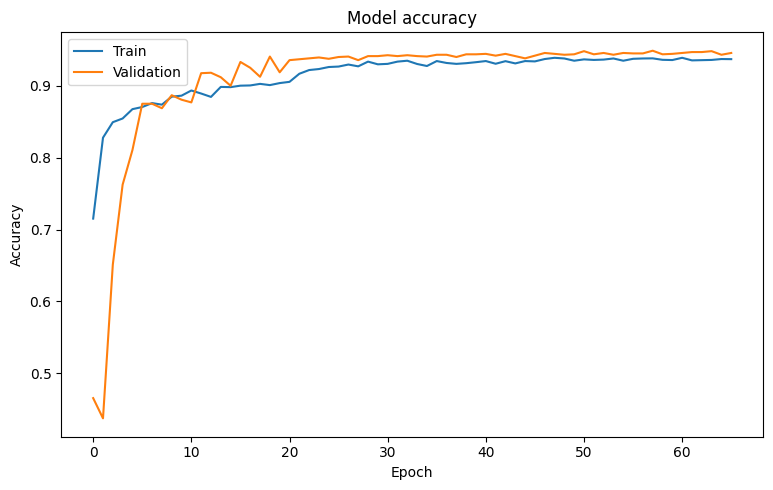

In [15]:
# Plot training & validation accuracy values
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


63/63 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.9415
Test Accuracy: 0.9415000081062317


In [17]:
# Making predictions on new data
new_data = [[61.007023, 106.570495, 21.414754, 1]]  # Example data
new_data = scaler.transform(new_data)  # Normalize the data
predictions = model.predict(new_data)
predicted_label = le.inverse_transform([np.argmax(predictions)])  # Convert back to original label
print(f'Predicted Label: {predicted_label[0]}')


C:\Users\jawad2019.namal\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 237ms/step
Predicted Label: Healthy


In [42]:
# Save the neural networks model weights
import pickle
pickle.dump(model, open('neural_networks.pickle', 'wb'))
print('Neural Networks trained Model Saved')

Neural Networks trained Model Saved


### **Model 2: K-Nearest Neighbors (KNN) Classifier Model**
- In this section, I will construct a K-Nearest Neighbors (KNN) Classifier model to predict plant health based on various environmental parameters such as humidity percentage, nitrogen levels, ambient temperature, and the presence of sunlight. The KNN algorithm is a type of instance-based learning that classifies a data point based on the majority class of its 'K' nearest neighbors in the feature space.

- Initially, I will prepare the data by segregating the features and the target variable, followed by splitting the data into training and testing sets. Scaling the features is a crucial step since KNN is a distance-based algorithm, and having features on a similar scale helps in improving the model's performance.

- Next, I will initialize the KNN classifier, specifying a suitable number of neighbors (K) to consider. I plan to experiment with different values of 'K' to find the optimal number that yields the best performance without overfitting. The model will then be trained using the training dataset.

- Subsequently, I will use the trained model to make predictions on the testing data. The model's performance will be evaluated using various metrics such as accuracy, precision, and recall, which will be presented in a detailed classification report.

In [18]:
# Import Library for knn
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Step 1: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Step 2: Initialize the KNN Classifier with k neighbors (you can experiment with different values of k)
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [21]:
# Step 3: Train the model on the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
# Step 4: Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

In [23]:
# Step 5: Evaluate the model's performance
print('Model Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9125
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       652
           1       0.87      0.88      0.88       695
           2       0.99      0.86      0.92       653

    accuracy                           0.91      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.92      0.91      0.91      2000



### **Model 3: Training a Tuned Logistic Regression Model with Class Weights**

- In this section, I will develop a Logistic Regression model, fine-tuned with the integration of class weights, to predict the health of plants based on the given environmental attributes: humidity percentage, nitrogen levels, ambient temperature, and the presence of sunlight. Logistic Regression, a statistical method for analyzing datasets where the outcome variable is categorical, is particularly suitable for binary or multiclass classification tasks.

- To begin, I will segregate the dataset into features and the target variable, followed by partitioning the data into training and testing subsets. This step ensures that the model can be evaluated on unseen data to gauge its predictive accuracy and generalization capabilities.

- Next, I will initialize the Logistic Regression classifier, incorporating class weights into the model. The inclusion of class weights helps in handling any imbalance in the dataset by assigning different weights to each class, thus preventing the model from being biased towards the majority class. I will also fine-tune other hyperparameters to optimize the model's performance further.

- After setting up the model, I will proceed to train it using the training dataset. This step involves learning the underlying patterns in the data to make accurate predictions.

- Following the training phase, I will use the model to make predictions on the testing data and evaluate its performance using various metrics such as accuracy, precision, and recall. These metrics will be detailed in a comprehensive classification report, providing insights into the model's performance across different classes.


In [24]:
# Import Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

In [25]:
# Compile and Train the model 
ltuw = LogisticRegression(max_iter=5000,class_weight={0:1,1:1,2:1},C=100,fit_intercept=True,
                               penalty='l2',solver='newton-cg')
ltuw.fit(X_train, y_train)

LogisticRegression(C=100, class_weight={0: 1, 1: 1, 2: 1}, max_iter=5000,
                   solver='newton-cg')

In [26]:
# Predict The Model
y_pred = ltuw.predict(X_test)
acc = accuracy_score(y_test, y_pred)
creport = classification_report(y_test, y_pred)
print(f'Accuracy Score is: {acc}')
print(creport)

Accuracy Score is: 0.638
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       652
           1       0.68      0.37      0.48       695
           2       0.76      0.56      0.64       653

    accuracy                           0.64      2000
   macro avg       0.67      0.64      0.62      2000
weighted avg       0.67      0.64      0.61      2000



### **Model 4: Training a Tuned Random Forest Model with Class Weights**

- In this section, I will focus on developing a Random Forest model, a powerful ensemble learning method, fine-tuned with class weights, to predict plant health based on the analyzed environmental factors: humidity percentage, nitrogen levels, ambient temperature, and the presence of sunlight. The Random Forest algorithm, which operates by constructing multiple decision trees during training time and outputting the class that is the mode of the classes from individual trees, is known for its high accuracy, ability to handle large data sets with higher dimensionality, and its ability to handle missing values.

- First, I will segregate the data into features and the target variable, and then partition it into training and testing sets to validate the model's performance on unseen data later.

- Next, I will initialize the Random Forest classifier, incorporating class weights to address any potential class imbalance in the dataset. This strategy ensures that the model does not exhibit a bias towards the majority class, providing a balanced approach to classification. Additionally, I will fine-tune various hyperparameters such as the number of trees and the maximum depth of the trees to optimize the model's predictive performance.

- Following the initialization, I will train the model using the training dataset, allowing it to learn the complex patterns and relationships in the data.

- After the training phase, I will employ the model to make predictions on the testing data, subsequently evaluating its performance using several metrics including accuracy, precision, and recall. A detailed classification report will be generated to provide a comprehensive view of the model's performance across different classes.

In [27]:
# Import Library for Random Classifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Compile and Train the model
rfc_tuned = RandomForestClassifier(random_state=1, n_jobs=-1, class_weight={0:1, 1:1, 2:1}, criterion='gini', max_depth= 6, min_samples_split= 12, n_estimators= 400, warm_start=True)
rfc_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1, 2: 1}, max_depth=6,
                       min_samples_split=12, n_estimators=400, n_jobs=-1,
                       random_state=1, warm_start=True)

In [29]:
# Predict The Model
y_pred = rfc_tuned.predict(X_test)
acc = accuracy_score(y_test, y_pred)
creport = classification_report(y_test, y_pred)
print(f'Accuracy Score is: {acc}')
print(creport)

Accuracy Score is: 0.9295
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       652
           1       0.91      0.89      0.90       695
           2       1.00      0.90      0.95       653

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



### **Model 5: Training a Tuned XGBoost Classifier Model with Class Weights**
- In this section, I will be crafting an XGBoost Classifier model, fine-tuned with class weights, to predict plant health based on the designated environmental factors: humidity percentage, nitrogen levels, ambient temperature, and the presence of sunlight. XGBoost, which stands for eXtreme Gradient Boosting, is an implementation of gradient boosted decision trees designed for speed and performance.

- Initially, I will delineate the dataset into features and the target variable, followed by a division into training and testing sets. This division is vital to assess the model's efficacy on unseen data, ensuring a reliable evaluation of its predictive capabilities.

- Subsequently, I will initialize the XGBoost classifier, integrating class weights to address any imbalances in the class distribution within the dataset. This integration ensures a balanced approach to the classification task, preventing the model from favoring the majority class and potentially overlooking the minority class. Moreover, I will fine-tune various hyperparameters such as learning rate and max depth to enhance the model's performance further.

- Once the model is set up, I will train it using the training dataset, allowing it to learn and adapt to the underlying patterns in the data, which will be instrumental in making accurate predictions.

- After the training process, I will utilize the model to make predictions on the testing data. The performance of the model will be evaluated using a range of metrics including accuracy, precision, and recall, offering a detailed insight into its classification prowess across different classes. A comprehensive classification report will be generated to encapsulate these insights.

In [30]:
# Import XGBoost Classifier
from xgboost import XGBClassifier

In [31]:
# Compile and Train the model
xgb_tuned = XGBClassifier(eval_metric = 'logloss', seed =0, 
               objective='binary:logistic',  booster='dart',
              eta=0.01, max_depth=3, n_estimators=150)
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)

In [32]:
# Predict The Model
y_pred = xgb_tuned.predict(X_test)
acc = accuracy_score(y_test, y_pred)
creport = classification_report(y_test, y_pred)
print(f'Accuracy Score is: {acc}')
print(creport)

Accuracy Score is: 0.859
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       652
           1       0.87      0.74      0.80       695
           2       1.00      0.85      0.92       653

    accuracy                           0.86      2000
   macro avg       0.88      0.86      0.86      2000
weighted avg       0.88      0.86      0.86      2000



### **Plot the ROC-AUC Curves of all the models**
- In this section, I will illustrate the performance of all the developed models by plotting their multi-class Receiver Operating Characteristic (ROC) curves alongside their respective Area Under the Curve (AUC) scores. In a multi-class classification scenario, the ROC curves represent the true positive rate (TPR) versus the false positive rate (FPR) for each class, considering it as the positive class while grouping the rest as the negative class.

- The AUC scores, which are computed for each class separately, provide a quantitative measure of a model's ability to distinguish between the classes across different thresholds. These scores are particularly vital in understanding how well the models can differentiate between the three distinct plant health categories based on the given environmental parameters.

- Each curve on the plot represents a different model, with the colors of the curves being allocated according to the AUC scores. This color-coding scheme facilitates a quick and clear comparison of the models, helping in identifying the ones with superior performance, indicated by higher AUC scores.

- Through this visualization, I aim to discern the model that demonstrates the best performance in terms of sensitivity and specificity for each class in the multi-class classification problem. This analysis will be instrumental in selecting the most optimal model for predicting plant health, ensuring a reliable and accurate classification

In [33]:
pred_prob1 = knn_classifier.predict_proba(X_test)
pred_prob2 = ltuw.predict_proba(X_test)
pred_prob3 = rfc_tuned.predict_proba(X_test)
pred_prob4 = xgb_tuned.predict_proba(X_test)
pred_prob5 = model.predict(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

63/63 [==============================] - 0s 3ms/step


In [34]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1, multi_class='ovo')
auc_score2 = roc_auc_score(y_test, pred_prob2, multi_class='ovo')
auc_score3 = roc_auc_score(y_test, pred_prob3, multi_class='ovo')
auc_score4 = roc_auc_score(y_test, pred_prob4, multi_class='ovo')
auc_score5 = roc_auc_score(y_test, pred_prob5, multi_class='ovo')

print(' Auc Score Of KNN Classifier: ', auc_score1,'\n', 'Auc Score Of Logistic Regression: ',auc_score2,'\n', 'Auc Score Of Random Forest Classifier: ', auc_score3, '\n', 'Auc Score Of XGBoost Classifier: ',auc_score4,'\n','Auc Score Of Keras Neural Networks: ', auc_score5)

 Auc Score Of KNN Classifier:  0.9492029520156363 
 Auc Score Of Logistic Regression:  0.7632733787040022 
 Auc Score Of Random Forest Classifier:  0.9711789104591335 
 Auc Score Of XGBoost Classifier:  0.9690546969596507 
 Auc Score Of Keras Neural Networks:  0.9717205476310804


C:\Users\jawad2019.namal\AppData\Local\Temp\ipykernel_28304\2376473096.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


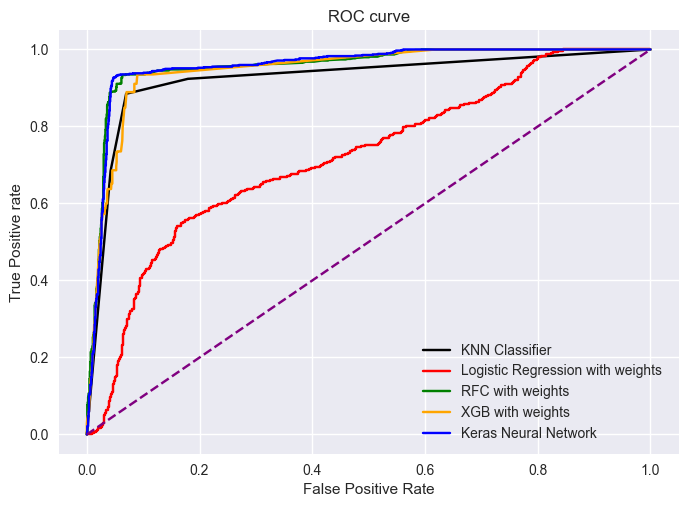

In [35]:
# plot roc curves

plt.style.use('seaborn')

plt.plot(fpr1, tpr1,color='black', label='KNN Classifier')
plt.plot(fpr2, tpr2,color='red', label='Logistic Regression with weights ')
plt.plot(fpr3, tpr3,color='green', label='RFC with weights')
plt.plot(fpr4, tpr4,color='orange', label='XGB with weights')
plt.plot(fpr5, tpr5,color='blue', label='Keras Neural Network')
plt.plot(p_fpr, p_tpr, linestyle='--', color='purple')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### **Main Function To Test Samples With the above Models**

In [36]:
import numpy as np

def predict_plant_health(model, humidity, nitrogen_level, ambient_temperature, presence_of_sunlight):
    """
    This function takes a trained model and environmental variables as inputs and returns the predicted plant health category.
    
    Parameters:
    model (trained model object): The trained model to use for prediction.
    humidity (float): The humidity percentage.
    nitrogen_level (float): The nitrogen level in mg/kg.
    ambient_temperature (float): The ambient temperature in °C.
    presence_of_sunlight (float): The presence of sunlight (you might want to specify the scale, e.g., 0-1 or 0-100).
    
    Returns:
    str: The predicted plant health category ('Healthy', 'Moderate', or 'Unhealthy').
    """
    
    # Creating a numpy array from the inputs
    input_data = np.array([[humidity, nitrogen_level, ambient_temperature, presence_of_sunlight]])
    
    # Making the prediction based on the type of the model
    if 'keras' in str(type(model)):
        # For neural network models (assuming TensorFlow/Keras is used)
        prediction = model.predict(input_data)
        predicted_class = np.argmax(prediction, axis=1)
    else:
        # For scikit-learn models like Random Forest
        predicted_class = model.predict(input_data)
    
    # Mapping the predicted class to the respective plant health category
    class_mapping = {0: 'Healthy', 1: 'Moderate', 2: 'Unhealthy'}
    
    return class_mapping[predicted_class[0]]

In [44]:
# Load saved neural networks model
filename = 'neural_networks.pickle'
neural_networkd_classifier = pickle.load(open(filename, 'rb'))

In [46]:
# Use keras neural network model to predict plant health
result = predict_plant_health(neural_networkd_classifier, 50.0, 30.0, 25.0, 0)
print(result)

1/1 [==============================] - 0s 30ms/step
Unhealthy


In [38]:
# Use random forest model to predict plant health
result = predict_plant_health(rfc_tuned, 50.0, 30.0, 25.0, 0.8)
print(result)

Unhealthy


In [39]:
# Use XGBoost model to predict plant health
result = predict_plant_health(xgb_tuned, 50.0, 30.0, 25.0, 0.8)
print(result)

Unhealthy


In [40]:
# Use KNN classifier model to predict plant health
result = predict_plant_health(knn_classifier, 50.0, 30.0, 25.0, 0.8)
print(result)

Unhealthy


In [41]:
# Use Logistic Regression model to predict plant health
result = predict_plant_health(ltuw, 50.0, 30.0, 25.0, 0.8)
print(result)

Healthy


Conclusion:
From the above results of model on the random data most of the models give accurate result except the logistic regression.